# Udacity Project 1

Project description: 
The purpose of this project is for you to show off your technical skills, but more importantly for you to begin putting together a portfolio that shows your ability to effectively communicate technical results.

For this project, you will be creating a blog post and Github repository to begin building a data science portfolio of your own. You can gain some inspiration from Robert's posts here.

Here is an overview of the main steps in this project, following the CRISP-DM process:

Come up with three questions you are interested in answering.
Extract the necessary data to answer these questions.
Perform necessary cleaning, analysis, and modeling.
Evaluate your results.
Share your insights with stakeholders in a blog post.

Using your dataset, you will choose 3 questions you aspire to answer from the data.

1) Pick a dataset, as mentioned on the previous page.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:
Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize
Provide a clear connection between your business questions and how the data answers them
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience

Project Deliverables
There are two deliverables that are required for project completion.

A Github repository for your code.
A blog post of your findings.
Your Github repository must have the following contents:

A README.md file that communicates the libraries used, the motivation for the project, the files in the repository with a small description of each, a summary of the results of the analysis, and necessary acknowledgments.
Your code in a Jupyter notebook, with appropriate comments, analysis, and documentation.
You may also provide any other necessary documentation you find necessary.
For the blog post, pick a platform of your own choice. For example, it can be on your website, a Medium post (Josh's sample report on How Do YOU Become A Developer?), or a Github blog post. Your blog must provide the following:

A clear and engaging title and image.
Your questions of interest.
Your findings for those questions with a supporting statistic(s), table, or visual.

## Edinburgh Airbnb Data

Is the fringe (August) the busiest time to visit Edinburgh? By how much do prices spike?


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,607014960957869901,https://www.airbnb.com/rooms/607014960957869901,20220610041446,2022-06-10,Beautiful 3 bed family home with hot tub,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/22ba6932-11e6...,454666979,https://www.airbnb.com/users/show/454666979,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,1040492,https://www.airbnb.com/rooms/1040492,20220610041446,2022-06-10,Edinburgh Waterfront Apartments (green),<b>The space</b><br />Set in Edinburgh’s fashi...,NaN,https://a0.muscache.com/pictures/18975884/b655...,1297674,https://www.airbnb.com/users/show/1297674,...,4.90,4.64,4.70,NaN,t,3,3,0,0,0.58
2,15420,https://www.airbnb.com/rooms/15420,20220610041446,2022-06-10,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,4.98,4.98,4.90,NaN,f,1,1,0,0,2.95
3,24288,https://www.airbnb.com/rooms/24288,20220610041446,2022-06-10,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Upper level of duplex. Boho rustic-chic former...,It's all in the mix: Culture-museums and galle...,https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,...,4.89,4.85,4.60,NaN,t,1,1,0,0,1.60
4,38628,https://www.airbnb.com/rooms/38628,20220610041446,2022-06-10,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,4.80,4.73,4.75,NaN,f,2,2,0,0,0.64


In [6]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,607014960957869901,2022-06-10,f,$300.00,$300.00,5,365
1,607014960957869901,2022-06-11,f,$300.00,$300.00,5,365
2,607014960957869901,2022-06-12,f,$300.00,$300.00,5,365
3,607014960957869901,2022-06-13,f,$300.00,$300.00,5,365
4,607014960957869901,2022-06-14,f,$300.00,$300.00,5,365


In [10]:
# remove columns of listings that arent relevant to this work
listings = listings.drop(["listing_url", "scrape_id", "last_scraped", "description", "neighborhood_overview",
                                 "picture_url", "host_url", "host_location", "host_about", "host_acceptance_rate", 
                                 "host_thumbnail_url", "host_picture_url", "host_neighbourhood", 
                                 "host_verifications", "host_has_profile_pic", "host_identity_verified", 
                                 "neighbourhood_cleansed", "neighbourhood_group_cleansed", "bathrooms_text", 
                                 "amenities", "minimum_minimum_nights", "minimum_maximum_nights", 
                                 "maximum_minimum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", 
                                 "maximum_nights_avg_ntm", "calendar_updated", "has_availability", 
                                 "availability_30", "availability_60", "availability_90", "availability_365", 
                                 "calendar_last_scraped", "number_of_reviews_ltm", "number_of_reviews_l30d", 
                                 "first_review", "last_review", "license", "instant_bookable", 
                                 "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", 
                                 "calculated_host_listings_count_private_rooms", 
                                 "calculated_host_listings_count_shared_rooms"], axis=1)

In [11]:
listings.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,607014960957869901,Beautiful 3 bed family home with hot tub,454666979,Rochelle,2022-04-17,within an hour,100%,f,0,0,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1040492,Edinburgh Waterfront Apartments (green),1297674,Edinburgh,2011-10-16,within a few hours,100%,f,3,3,...,365,65,4.83,4.82,4.83,4.98,4.90,4.64,4.70,0.58
2,15420,Georgian Boutique Apt City Centre,60423,Charlotte,2009-12-06,within an hour,100%,t,3,3,...,30,409,4.97,4.98,4.96,4.97,4.98,4.98,4.90,2.95
3,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,2009-10-17,within an hour,100%,f,1,1,...,365,228,4.59,4.81,4.30,4.87,4.89,4.85,4.60,1.60
4,38628,Edinburgh Holiday Let,165635,Trish,2010-07-13,within a day,100%,f,2,2,...,120,62,4.65,4.77,4.68,4.83,4.80,4.73,4.75,0.64


###  EDA

In [13]:
listings.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,6.767000e+03,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,0.0,6582.000000,6633.000000,...,6767.000000,6767.000000,5760.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5760.000000
mean,8.341408e+16,1.241059e+08,20.699867,20.699867,55.950618,-3.197669,3.642678,NaN,1.677150,2.168551,...,520.148515,63.194473,4.744991,4.828175,4.766017,4.860141,4.866069,4.817192,4.714846,1.789156
std,2.091533e+17,1.292826e+08,149.001198,149.001198,0.016212,0.039971,2.189243,NaN,1.105782,1.736726,...,494.547058,99.412026,0.449043,0.315592,0.345973,0.291617,0.283129,0.269640,0.332843,1.859623
min,1.542000e+04,4.649800e+04,0.000000,0.000000,55.835050,-3.444285,0.000000,NaN,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,1.806787e+07,2.234652e+07,1.000000,1.000000,55.942720,-3.211480,2.000000,NaN,1.000000,1.000000,...,30.000000,3.000000,4.680000,4.800000,4.690000,4.840000,4.840000,4.750000,4.640000,0.460000
50%,3.260983e+07,6.868926e+07,1.000000,1.000000,55.951250,-3.192640,4.000000,NaN,1.000000,2.000000,...,365.000000,22.000000,4.850000,4.910000,4.870000,4.940000,4.950000,4.890000,4.780000,1.250000
75%,5.015511e+07,1.991208e+08,5.000000,5.000000,55.960335,-3.178180,4.000000,NaN,2.000000,3.000000,...,1125.000000,80.000000,4.960000,4.980000,4.970000,5.000000,5.000000,4.980000,4.890000,2.590000
max,6.455813e+17,4.628648e+08,3404.000000,3404.000000,56.012030,-3.058470,16.000000,NaN,40.000000,40.000000,...,1125.000000,1599.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,42.750000


In [14]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,2.469955e+06,2.469955e+06,2.469955e+06
mean,8.341408e+16,5.231729e+00,7.326931e+02
std,2.091379e+17,2.835187e+01,4.865407e+02
min,1.542000e+04,1.000000e+00,1.000000e+00
25%,1.806489e+07,2.000000e+00,1.000000e+02
50%,3.260983e+07,2.000000e+00,1.125000e+03
75%,5.015523e+07,3.000000e+00,1.125000e+03
max,6.455813e+17,1.000000e+03,1.125000e+03


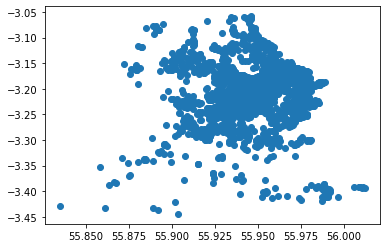

In [18]:
# alt+3 Overview of locations
plt.scatter(x=listings['latitude'], y=listings['longitude'])
plt.show()

In [21]:
pip install plotly==5.10.0

     |████████████████████████████████| 15.2 MB 273 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.express as px

In [34]:
#fig = px.scatter_geo(listings,lat='latitude',lon='longitude')
#fig.show()

In [33]:
# Density of Edinburgh airbnb locations
fig = px.density_mapbox(listings,lat='latitude',lon='longitude', radius=1, center=dict(lat=55.946, lon=-3.189), 
                       zoom=10, mapbox_style = 'stamen-terrain')
fig.show()